# Case Study on Testing of Hypothesis

## Introduction

Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data.
The test provides evidence concerning the plausibility of the hypothesis, given the data.
Statistical analysts test a hypothesis by measuring and examining a random sample of the population being analyzed.

## Scenario

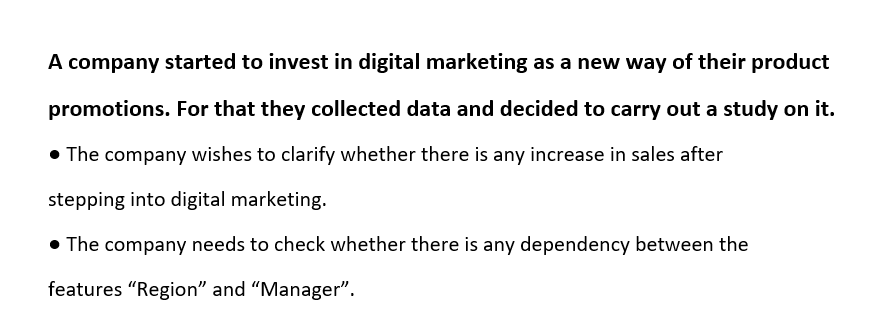

### Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
import scipy.stats as stats
import researchpy as rp
from scipy.stats import chi2_contingency

### Importing the dataset

In [2]:
data = pd.read_csv('Sales_add.csv')

### Analyzing the data

In [3]:
data.head()


,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


## ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing

### Subsetting the Data

Before calculating some descriptive statistics, we will subset the data.

In [4]:
bdata = data['Sales_before_digital_add(in $)']
adata = data['Sales_After_digital_add(in $)']

●bdata = Sales before     

●adata = Sales after

### Numerical/Statistical analysis of the dataset

In [5]:
adata.describe()

count        22.000000
mean     231123.727273
std       25556.777061
min      187305.000000
25%      214960.750000
50%      229986.500000
75%      250909.000000
max      276279.000000
Name: Sales_After_digital_add(in $), dtype: float64

Inference : Average Sales after adding digital marketing is ₹ 231124

In [6]:
bdata.describe()

count        22.000000
mean     149239.954545
std       14844.042921
min      130263.000000
25%      138087.750000
50%      147444.000000
75%      157627.500000
max      178939.000000
Name: Sales_before_digital_add(in $), dtype: float64

Inference : Average Sales before adding digital marketing is ₹  149240

### Hypothesis

Let’s decide null and alternate hypothesis

###### Null Hypothesis - No change in Sales after investing in digital marketing.

###### Alternate Hypothesis - There is an increase in Sales after investing in digital marketing.

###### Alpha = 5% or 0.05

Two-sample t-test using SciPy:

In [7]:
ttest,res = stats.ttest_ind(adata, bdata, 
                      equal_var=True)

display(res)
if res <0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

2.614368006904645e-16

Reject null hypothesis


Inference : Here, we reject the null Hypothesis. It means we accept the alternative hypothesis that the sales is increased after investing into digital marketing.

### ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.


#### CHI-SQUARE (x²) TEST OF INDEPENDENCE

Before testing this relationship, let's see some basic univariate statistics.

In [8]:
rp.summary_cat(data[["Region", "Manager"]])

,Variable,Outcome,Count,Percent
0,Region,Region - A,10,45.45
1,,Region - B,7,31.82
2,,Region - C,5,22.73
3,Manager,Manager - A,9,40.91
4,,Manager - B,7,31.82
5,,Manager - C,6,27.27


The data is majority in the Region A while the Manager count are fairly similar except for the Manager - A having the highest  population.

### CHI-SQUARE TEST OF INDEPENDENCE WITH SCIPY.STATS
The method that needs to be used is scipy.stats.chi2_contingency and it's official documentation can be found here. This method requires one to pass a crosstabulation table, this can be accomplished using pandas.crosstab.

In [9]:
crosstab = pd.crosstab(data["Region"], data["Manager"])

crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


### Hypothesis


Let’s decide null and alternate hypothesis

###### Null Hypothesis - No dependency between the features “Region” and “Manager”.

###### Alternate Hypothesis - Dependency between the features “Region” and “Manager”.

###### Alpha = 5% or 0.05

In [10]:
stats.chi2_contingency(crosstab)
stat, pv, dof, expected=chi2_contingency(crosstab)

In [11]:
print(chi2_contingency(crosstab)[0:3])
alpha = 0.05
print("Here the pv value is " + str(pv))
if pv <= alpha:
    print('Dependent reject H0')
else:
    print('Independent H0 holds true')

(3.050566893424036, 0.5493991051158094, 4)
Here the pv value is 0.5493991051158094
Independent H0 holds true


Inference : Here, we accept the null hypothesis, that means there is no dependency between the features “Region” and “Manager”. 

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 